In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
estimates_df = pd.read_excel('WHO TB dataset_2024-03-21.xlsx', sheet_name='LTBI_estimates_2024-03-21')

In [4]:
estimates_df.head()

,country,iso2,iso3,iso_numeric,g_whoregion,year,source_hh,e_hh_size,prevtx_data_available,newinc_con_prevtx,...,e_hh_contacts_hi,e_prevtx_hh_contacts_pct,e_prevtx_hh_contacts_pct_lo,e_prevtx_hh_contacts_pct_hi,e_prevtx_eligible,e_prevtx_eligible_lo,e_prevtx_eligible_hi,e_prevtx_kids_pct,e_prevtx_kids_pct_lo,e_prevtx_kids_pct_hi
0,Afghanistan,AF,AFG,4,EMR,2022,DHS; 2015-10-19,8.036738,60.0,32250.0,...,170000.0,19.0,18.0,19.0,30000.0,27000.0,32000.0,100.0,100.0,100.0
1,Albania,AL,ALB,8,EUR,2022,DHS; 2017-12-01,3.299611,60.0,21.0,...,410.0,5.3,5.1,5.4,7.5,4.8,10.0,27.0,20.0,42.0
2,Algeria,DZ,DZA,12,AFR,2022,Dépenses de consommation des ménages algériens...,6.000000,60.0,1091.0,...,24000.0,4.6,4.5,4.7,800.0,520.0,1100.0,100.0,100.0,100.0
3,Angola,AO,AGO,24,AFR,2022,DHS; 2016-01-01,4.815657,0.0,NaN,...,130000.0,NaN,NaN,NaN,26000.0,23000.0,28000.0,NaN,NaN,NaN
4,Argentina,AR,ARG,32,AMR,2022,DYB; 2010-07-01,3.258658,0.0,NaN,...,19000.0,NaN,NaN,NaN,490.0,320.0,670.0,NaN,NaN,NaN


In [5]:
estimates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       182 non-null    object 
 1   iso2                          181 non-null    object 
 2   iso3                          182 non-null    object 
 3   iso_numeric                   182 non-null    int64  
 4   g_whoregion                   182 non-null    object 
 5   year                          182 non-null    int64  
 6   source_hh                     182 non-null    object 
 7   e_hh_size                     182 non-null    float64
 8   prevtx_data_available         165 non-null    float64
 9   newinc_con_prevtx             128 non-null    float64
 10  newinc_con04_prevtx           123 non-null    float64
 11  ptsurvey_newinc               0 non-null      float64
 12  ptsurvey_newinc_con04_prevtx  0 non-null      float64
 13  e_hh_

In [6]:
estimates_df = estimates_df.drop(['ptsurvey_newinc','ptsurvey_newinc_con04_prevtx'],axis=1)

In [7]:
estimates_df[estimates_df['e_hh_contacts'].isnull()]

,country,iso2,iso3,iso_numeric,g_whoregion,year,source_hh,e_hh_size,prevtx_data_available,newinc_con_prevtx,...,e_hh_contacts_hi,e_prevtx_hh_contacts_pct,e_prevtx_hh_contacts_pct_lo,e_prevtx_hh_contacts_pct_hi,e_prevtx_eligible,e_prevtx_eligible_lo,e_prevtx_eligible_hi,e_prevtx_kids_pct,e_prevtx_kids_pct_lo,e_prevtx_kids_pct_hi
38,Comoros,KM,COM,174,AFR,2022,DHS; 2012-10-15,5.371601,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,Sudan,SD,SDN,729,EMR,2022,IPUMS; 2008-07-01,5.590376,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,Tokelau,TK,TKL,772,WPR,2022,DYB; 2011-07-01,5.243902,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
estimates_df=estimates_df.drop([38,155,164],axis=0)

In [9]:
highest_household_contact = estimates_df.sort_values('e_hh_contacts',ascending=False).head(10)[['country','e_hh_contacts','e_prevtx_hh_contacts_pct']]

In [10]:
highest_household_contact

,country,e_hh_contacts,e_prevtx_hh_contacts_pct
76,India,3600000.0,22.0
123,Pakistan,960000.0,1.1
77,Indonesia,940000.0,1.9
118,Nigeria,820000.0,14.0
34,China,650000.0,1.2
128,Philippines,610000.0,5.5
47,Democratic Republic of the Congo,580000.0,15.0
12,Bangladesh,470000.0,33.0
151,South Africa,290000.0,6.0
169,Uganda,190000.0,73.0


**The table above shows the 10 countries with the highest household contacts of people newly diagnosed with pulmonary TB disease and the percentage of household contacts provided with TB preventive treatment. The low percentages given TB preventive treatment is a thing of concern and should be adressed worldwide**

Text(0, 0.5, ' percentagee provided with TB preventive treatment')

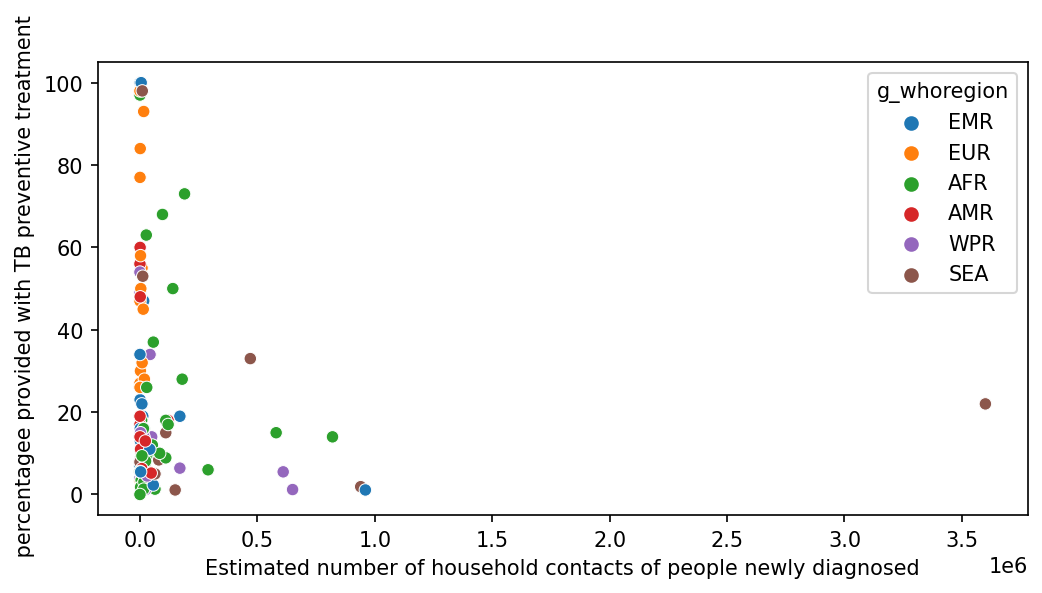

In [15]:

plt.figure(figsize=(8,4),dpi=150)
sns.scatterplot(data=estimates_df,x='e_hh_contacts',y='e_prevtx_hh_contacts_pct',hue='g_whoregion')
plt.xlabel('Estimated number of household contacts of people newly diagnosed')
plt.ylabel(' percentagee provided with TB preventive treatment')

In [16]:
outcomes_df = pd.read_excel('WHO TB dataset_2024-03-21.xlsx', sheet_name='TB_outcomes_2024-03-21')

In [17]:
outcomes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5969 entries, 0 to 5968
Data columns (total 73 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             5969 non-null   object 
 1   iso2                5941 non-null   object 
 2   iso3                5969 non-null   object 
 3   iso_numeric         5969 non-null   int64  
 4   g_whoregion         5969 non-null   object 
 5   year                5969 non-null   int64  
 6   rep_meth            3034 non-null   float64
 7   new_sp_coh          3052 non-null   float64
 8   new_sp_cur          2945 non-null   float64
 9   new_sp_cmplt        2943 non-null   float64
 10  new_sp_died         2992 non-null   float64
 11  new_sp_fail         2876 non-null   float64
 12  new_sp_def          2954 non-null   float64
 13  c_new_sp_tsr        3006 non-null   float64
 14  new_snep_coh        1301 non-null   float64
 15  new_snep_cmplt      1289 non-null   float64
 16  new_sn

## MultiDrug-Resistant Tuberculosis (MDR)

**This is a form of tuberculosis caused by bacteria that are resistant to first-line treatment drugs like isoniazid and rifampicin. It is more challenging to treat than drug susceptible tuberculosis**

In [18]:
mdr_df = outcomes_df.groupby(by=['year']).sum()[['mdr_coh','mdr_died','mdr_fail','mdr_lost','mdr_succ']]

In [19]:
mdr_df = mdr_df.drop([1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2001,2007,2008,2009,2021])

In [20]:
mdr_df

,mdr_coh,mdr_died,mdr_fail,mdr_lost,mdr_succ
year,,,,,
2010,35432.0,5345.0,3204.0,5154.0,17573.0
2011,52481.0,8608.0,5744.0,8396.0,25286.0
2012,74011.0,12333.0,6890.0,12145.0,37060.0
2013,92307.0,15667.0,7968.0,14371.0,47982.0
2014,103002.0,16936.0,8464.0,15061.0,55854.0
2015,114238.0,17629.0,9300.0,16170.0,63251.0
2016,126173.0,19029.0,9698.0,18772.0,71112.0
2017,131196.0,19171.0,9749.0,20278.0,75540.0
2018,152148.0,20303.0,13788.0,21824.0,90281.0


**The table above shows the number of mdr total cases recoreded(mdr_coh), the number of patients tthat died, had failed treatment, didnt finish treatment and had successful treatment from 2010 to 2020**

In [21]:
mdr_df['per_succ'] = np.round((mdr_df['mdr_succ']/mdr_df['mdr_coh'])*100,1)

In [22]:
mdr_df['per_died'] = np.round((mdr_df['mdr_died']/mdr_df['mdr_coh'])*100,1)

In [23]:
mdr_df

,mdr_coh,mdr_died,mdr_fail,mdr_lost,mdr_succ,per_succ,per_died
year,,,,,,,
2010,35432.0,5345.0,3204.0,5154.0,17573.0,49.6,15.1
2011,52481.0,8608.0,5744.0,8396.0,25286.0,48.2,16.4
2012,74011.0,12333.0,6890.0,12145.0,37060.0,50.1,16.7
2013,92307.0,15667.0,7968.0,14371.0,47982.0,52.0,17.0
2014,103002.0,16936.0,8464.0,15061.0,55854.0,54.2,16.4
2015,114238.0,17629.0,9300.0,16170.0,63251.0,55.4,15.4
2016,126173.0,19029.0,9698.0,18772.0,71112.0,56.4,15.1
2017,131196.0,19171.0,9749.0,20278.0,75540.0,57.6,14.6
2018,152148.0,20303.0,13788.0,21824.0,90281.0,59.3,13.3


**per_succ column is the percentage of total mdr tb patient that had successful treatment while per_died is the percentage that died**

In [24]:
mdr_df[['per_succ','per_died']]

,per_succ,per_died
year,,
2010,49.6,15.1
2011,48.2,16.4
2012,50.1,16.7
2013,52.0,17.0
2014,54.2,16.4
2015,55.4,15.4
2016,56.4,15.1
2017,57.6,14.6
2018,59.3,13.3


Text(0.5, 1.0, 'MDR TREATMENT SUCCESS RATE(%)')

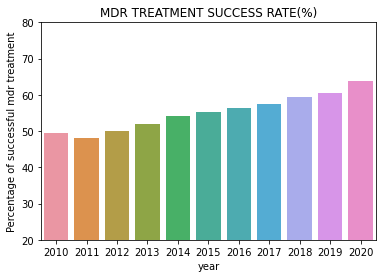

In [60]:
sns.barplot(data=mdr_df,y='per_succ',x=mdr_df.index)
plt.ylabel('Percentage of successful mdr treatment')
plt.ylim(20,80)
plt.title('MDR TREATMENT SUCCESS RATE(%)')

Text(0.5, 1.0, 'MDR TREATMENT SUCCESS RATE(%)')

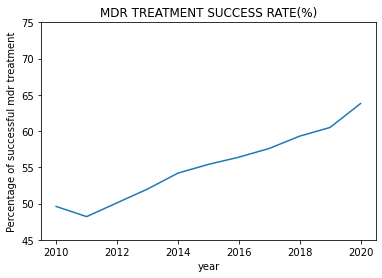

In [61]:
sns.lineplot(data=mdr_df,y='per_succ',x='year')
plt.ylabel('Percentage of successful mdr treatment')
plt.ylim(45,75)
plt.title('MDR TREATMENT SUCCESS RATE(%)')

**The visualizations show that MDR TB treatment has progressed significantly over the years with higher success rates and lower death rates**

Text(0.5, 1.0, 'MDR TREATMENT DEATH RATE(%)')

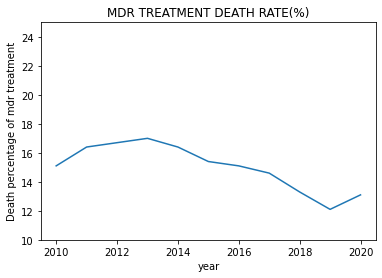

In [62]:
sns.lineplot(data=mdr_df,y='per_died',x='year')
plt.ylabel('Death percentage of mdr treatment')
plt.ylim(10,25)
plt.title('MDR TREATMENT DEATH RATE(%)')

## Extensively Drug-Resistant tuberculosis(XDR)

**This is a more severe form of TB that is resistant to the standard first-line drugs AND second-line drugs(e.g.fluoroquinolones). It is more severe than both drug susceptible TB and MDR TB**

In [25]:
xdr_df = outcomes_df.groupby(by=['year']).sum()[['xdr_coh','xdr_died','xdr_fail','xdr_lost','xdr_succ']]

In [26]:
xdr_df = xdr_df.drop([1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2001,2007,2008,2009,2021])

In [27]:
xdr_df

,xdr_coh,xdr_died,xdr_fail,xdr_lost,xdr_succ
year,,,,,
2010,884.0,376.0,105.0,91.0,164.0
2011,1276.0,433.0,123.0,171.0,281.0
2012,2729.0,834.0,514.0,352.0,699.0
2013,4236.0,1193.0,878.0,416.0,1202.0
2014,6777.0,1895.0,1449.0,695.0,2035.0
2015,8397.0,2198.0,1587.0,873.0,2888.0
2016,9267.0,2366.0,1639.0,1016.0,3573.0
2017,11214.0,2501.0,1986.0,1242.0,4806.0
2018,8214.0,1542.0,1265.0,894.0,4255.0


**The table above shows the number of xdr total cases recoreded, the number of patients tthat died, had failed treatment, didnt finish treatment and had successful treatment from 2010 to 2020**

In [28]:
xdr_df['per_succ'] = np.round((xdr_df['xdr_succ']/xdr_df['xdr_coh'])*100,1)

In [29]:
xdr_df['per_died'] = np.round((xdr_df['xdr_died']/xdr_df['xdr_coh'])*100,1)

In [30]:
xdr_df[['per_succ','per_died']]

,per_succ,per_died
year,,
2010,18.6,42.5
2011,22.0,33.9
2012,25.6,30.6
2013,28.4,28.2
2014,30.0,28.0
2015,34.4,26.2
2016,38.6,25.5
2017,42.9,22.3
2018,51.8,18.8


**From the above table we can see how much more challenging and deadly XDR TB is but we can also see the improvements in treatment over the years**

Text(0.5, 1.0, 'XDR TREATMENT SUCCESS RATE(%)')

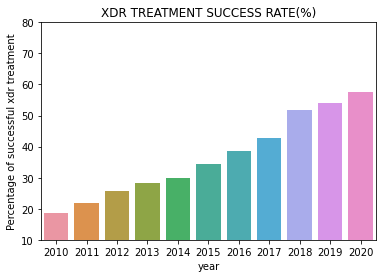

In [63]:
sns.barplot(data=xdr_df,y='per_succ',x=xdr_df.index)
plt.ylabel('Percentage of successful xdr treatment')
plt.ylim(10,80)
plt.title('XDR TREATMENT SUCCESS RATE(%)')

Text(0.5, 1.0, 'XDR TREATMENT SUCCESS RATE(%)')

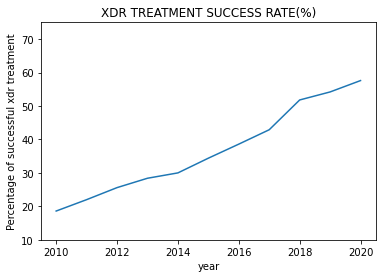

In [64]:
sns.lineplot(data=xdr_df,y='per_succ',x='year')
plt.ylabel('Percentage of successful xdr treatment')
plt.ylim(10,75)
plt.title('XDR TREATMENT SUCCESS RATE(%)')

Text(0.5, 1.0, 'XDR TREATMENT DEATH RATE(%)')

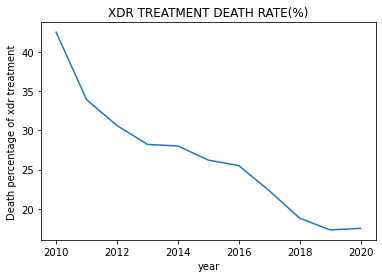

In [65]:
sns.lineplot(data=xdr_df,y='per_died',x='year')
plt.ylabel('Death percentage of xdr treatment')
#plt.ylim(10,25)
plt.title('XDR TREATMENT DEATH RATE(%)')

**The visualizations above also show how much better XDR TB treatment has become over the years**

## Treatment of TB in HIV positive patients

In [39]:
hiv_df = outcomes_df.groupby(by=['year']).sum()[['tbhiv_coh','tbhiv_died','tbhiv_fail','tbhiv_lost','tbhiv_succ']]

In [40]:
hiv_df = hiv_df.drop([1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2001,2007,2008,2009,2010,2011,2021])

In [41]:
hiv_df

,tbhiv_coh,tbhiv_died,tbhiv_fail,tbhiv_lost,tbhiv_succ
year,,,,,
2012,432974.0,44641.0,4434.0,25320.0,292937.0
2013,421684.0,43973.0,4418.0,25749.0,290621.0
2014,424274.0,45892.0,4706.0,25253.0,316613.0
2015,470051.0,49687.0,3028.0,26454.0,366847.0
2016,428367.0,46923.0,3195.0,24752.0,328896.0
2017,447226.0,48104.0,3823.0,27671.0,336808.0
2018,405769.0,46288.0,3879.0,21762.0,308685.0
2019,410839.0,45011.0,3894.0,26841.0,314625.0
2020,350200.0,37291.0,4825.0,20628.0,271118.0


In [42]:
hiv_df['per_succ'] = np.round((hiv_df['tbhiv_succ']/hiv_df['tbhiv_coh'])*100,1)

In [43]:
hiv_df['per_died'] = np.round((hiv_df['tbhiv_died']/hiv_df['tbhiv_coh'])*100,1)

In [44]:
hiv_df[['per_succ','per_died']]

,per_succ,per_died
year,,
2012,67.7,10.3
2013,68.9,10.4
2014,74.6,10.8
2015,78.0,10.6
2016,76.8,11.0
2017,75.3,10.8
2018,76.1,11.4
2019,76.6,11.0
2020,77.4,10.6


**The table above shows that successful treatments of TB in patients with HIV has improved from 67.7% to 77.4% between 2012 and 2020 while the deathrate seems to be constant at about 10.6%**

Text(0.5, 1.0, 'TB SUCCESS RATE FOR HIV+ PATIENTS(%)')

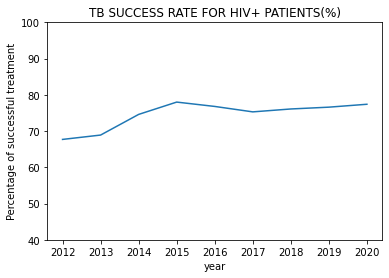

In [66]:
sns.lineplot(data=hiv_df,y='per_succ',x='year')
plt.ylabel('Percentage of successful treatment')
plt.ylim(40,100)
plt.title('TB SUCCESS RATE FOR HIV+ PATIENTS(%)')

## Overall treatment success 

In [48]:
success_df = outcomes_df[['country','year','c_new_tsr', 'c_ret_tsr','c_tbhiv_tsr']]

In [49]:
treatment_success_df = success_df.groupby(by=['year']).mean()

In [52]:
treatment_success_df = treatment_success_df.drop([1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2001,2007,2008,2009,2021])

In [53]:
treatment_success_df

,c_new_tsr,c_ret_tsr,c_tbhiv_tsr
year,,,
2010,77.335025,68.055215,58.370000
2011,77.108247,66.289157,58.873786
2012,78.293194,64.377483,57.256881
2013,78.914141,63.604027,61.747748
2014,78.484043,63.409396,62.432432
2015,79.324468,66.027397,64.201681
2016,79.005102,67.597315,63.153846
2017,78.842640,67.266667,68.891473
2018,78.713542,64.684564,65.326087


**Below is the average treatment success rate for all new cases in percent from 2010-2020**

In [55]:
#Treatment success rate for all new cases (including relapse cases if rel_with_new_flg = 1), percent

np.round(treatment_success_df['c_new_tsr'].mean(),2)

78.58

**Below is the treatment success rate for retreatment cases in percent from 2010-2020**

In [57]:
#Treatment success rate for re-treatment cases (excluding relapse cases if rel_with_new_flg = 1), percent

np.round(treatment_success_df['c_ret_tsr'].mean(),2)

65.82

**Below is the treatment success rate for HIV positive TB cases in percent from 2010-2020**

In [58]:
#Treatment success rate for HIV-positive TB cases, percent

np.round(treatment_success_df['c_tbhiv_tsr'].mean(),2)

63.34